# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 

## Model 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

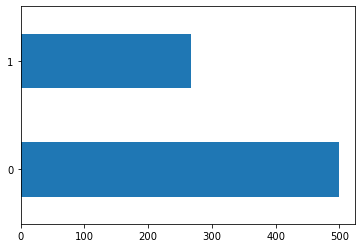

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [8]:
#statsmodels

In [9]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                 0.05922
Time:                        18:34:03   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [10]:
#scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [12]:
loj_model.intercept_

array([-5.88679617])

In [13]:
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

## Tahmin & Model Tuning

In [14]:
y_pred = loj_model.predict(X)

In [15]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [18]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

In [20]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [21]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [22]:
y_probs[0:10]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565,
       0.20113891, 0.1199647 , 0.72204323, 0.67946536, 0.07735479])

In [23]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [24]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [25]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [26]:
accuracy_score(y, y_pred)

0.7747395833333334

In [27]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [28]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565])

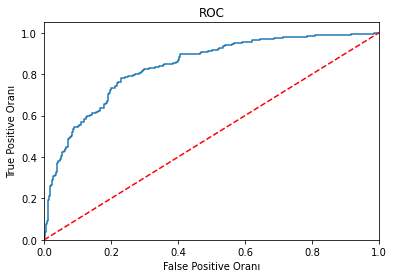

In [29]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [31]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [33]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

# Gaussian Naive Bayes

In [34]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [37]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [38]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [39]:
y_pred = nb_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [41]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Tahmin

In [42]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [43]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [47]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [48]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [49]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [50]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [51]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [52]:
y_pred = knn_tuned.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC

## Model & Tahmin

In [54]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [55]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [56]:
svm_model

SVC(kernel='linear')

In [57]:
y_pred = svm_model.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [59]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [60]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [61]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [62]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC

## Model & Tahmin

In [63]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [64]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [65]:
svc_model

SVC()

In [66]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [67]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [68]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [69]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [70]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [71]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

## Model & Tahmin

In [72]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler  

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [79]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [80]:
mlpc

MLPClassifier()

In [81]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        d:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
    The 

In [82]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [83]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [84]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [85]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [86]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [87]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

# CART

## Model & Tahmin

In [88]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [91]:
cart_model

DecisionTreeClassifier()

In [92]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[1] <= 130.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (0 if x[7] <= 57.5 else 1) if x[2] <= 73.0 else 0) if x[5] <=
    26.94

In [93]:
x = [9]

In [94]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [95]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning

In [96]:
cart_model

DecisionTreeClassifier()

In [97]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        d:\anaconda\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then conside

In [98]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [99]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [100]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [101]:
#final

In [102]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [103]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [104]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [107]:
rf_model

RandomForestClassifier()

In [108]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [109]:
rf_model

RandomForestClassifier()

In [110]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        d:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the informa

In [111]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [112]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [113]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [114]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [115]:
#final

In [116]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [117]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [118]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

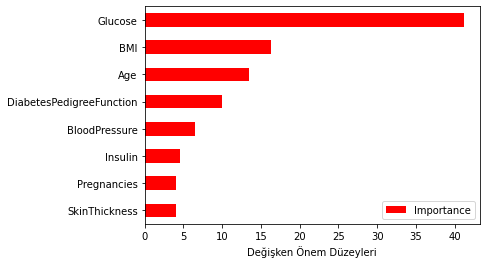

In [119]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [120]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [123]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [124]:
gbm_model

GradientBoostingClassifier()

In [125]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning rate shrinks t

In [126]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [127]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [128]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [129]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [130]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [131]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [132]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

In [133]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [134]:
#!pip install xgboost
from xgboost import XGBClassifier

In [135]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[18:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [136]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [138]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        d:\anaconda\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tu

In [140]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [141]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [142]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[19:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [143]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [144]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [145]:
xgb_tuned =  xgb.fit(X_train,y_train)

[19:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# LightGBM

In [147]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [148]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [149]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [150]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [151]:
## Model Tuning

In [152]:
lgbm_model

LGBMClassifier()

In [153]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           d:\anaconda\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=100)
   

In [154]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [155]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [156]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [157]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [158]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [159]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [160]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# CatBoost

## Model & Tahmin

In [161]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [162]:
#!pip install catboost
from catboost import CatBoostClassifier

In [163]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 144ms	remaining: 2m 24s
1:	learn: 0.6843414	total: 146ms	remaining: 1m 12s
2:	learn: 0.6805760	total: 147ms	remaining: 48.9s
3:	learn: 0.6765782	total: 148ms	remaining: 36.9s
4:	learn: 0.6720829	total: 150ms	remaining: 29.8s
5:	learn: 0.6681617	total: 151ms	remaining: 25s
6:	learn: 0.6641912	total: 152ms	remaining: 21.6s
7:	learn: 0.6602881	total: 153ms	remaining: 19s
8:	learn: 0.6562626	total: 154ms	remaining: 17s
9:	learn: 0.6528483	total: 155ms	remaining: 15.4s
10:	learn: 0.6487823	total: 157ms	remaining: 14.1s
11:	learn: 0.6454980	total: 158ms	remaining: 13s
12:	learn: 0.6418953	total: 159ms	remaining: 12.1s
13:	learn: 0.6374431	total: 161ms	remaining: 11.3s
14:	learn: 0.6339676	total: 162ms	remaining: 10.6s
15:	learn: 0.6304252	total: 163ms	remaining: 10.1s
16:	learn: 0.6266998	total: 165ms	remaining: 9.53s
17:	learn: 0.6237660	total: 166ms	remaining: 9.05s
18:	learn: 0.6204394	total: 167ms	remaining: 8.64s
19:	learn: 0.617012

In [164]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [165]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [166]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 3.03ms	remaining: 602ms
1:	learn: 0.6811157	total: 6.19ms	remaining: 613ms
2:	learn: 0.6752970	total: 9.07ms	remaining: 596ms
3:	learn: 0.6697432	total: 12ms	remaining: 588ms
4:	learn: 0.6641758	total: 15ms	remaining: 586ms
5:	learn: 0.6576656	total: 17.9ms	remaining: 577ms
6:	learn: 0.6521870	total: 20.7ms	remaining: 570ms
7:	learn: 0.6465564	total: 23.6ms	remaining: 567ms
8:	learn: 0.6407595	total: 26.8ms	remaining: 568ms
9:	learn: 0.6357725	total: 29.7ms	remaining: 565ms
10:	learn: 0.6299942	total: 32.5ms	remaining: 558ms
11:	learn: 0.6240480	total: 35.3ms	remaining: 553ms
12:	learn: 0.6196095	total: 38.4ms	remaining: 552ms
13:	learn: 0.6148715	total: 41.6ms	remaining: 553ms
14:	learn: 0.6092626	total: 44.7ms	remaining: 551ms
15:	learn: 0.6046764	total: 47.5ms	remaining: 546ms
16:	learn: 0.6012725	total: 50.5ms	remaining: 543ms
17:	learn: 0.5958121	total: 53.6ms	remaining: 542ms
18:	learn: 0.5903

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [167]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [168]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616270	total: 1.03ms	remaining: 205ms
1:	learn: 0.6400322	total: 2.09ms	remaining: 207ms
2:	learn: 0.6218089	total: 3.05ms	remaining: 201ms
3:	learn: 0.6091426	total: 4.06ms	remaining: 199ms
4:	learn: 0.5937764	total: 5.16ms	remaining: 201ms
5:	learn: 0.5776944	total: 6.32ms	remaining: 204ms
6:	learn: 0.5640806	total: 7.33ms	remaining: 202ms
7:	learn: 0.5465023	total: 8.17ms	remaining: 196ms
8:	learn: 0.5342910	total: 9.37ms	remaining: 199ms
9:	learn: 0.5253110	total: 10.3ms	remaining: 196ms
10:	learn: 0.5152173	total: 11.2ms	remaining: 192ms
11:	learn: 0.5038768	total: 11.9ms	remaining: 186ms
12:	learn: 0.4940545	total: 12.6ms	remaining: 182ms
13:	learn: 0.4868880	total: 13.4ms	remaining: 178ms
14:	learn: 0.4799839	total: 14.2ms	remaining: 175ms
15:	learn: 0.4744068	total: 15ms	remaining: 173ms
16:	learn: 0.4684004	total: 15.9ms	remaining: 171ms
17:	learn: 0.4618850	total: 16.6ms	remaining: 168ms
18:	learn: 0.4560376	total: 17.4ms	remaining: 166ms
19:	learn: 0.4520084	tot

In [169]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Tüm Modellerin Karşılaştırılması

In [170]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 75.7576%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%
----------------------------
CatBoostClassifier:
Accuracy: 74.4589%
----------------------------
LGBMClassifier:
Accuracy: 75.3247%
----------------------------
XGBClassifier:
Accuracy: 74.4589%


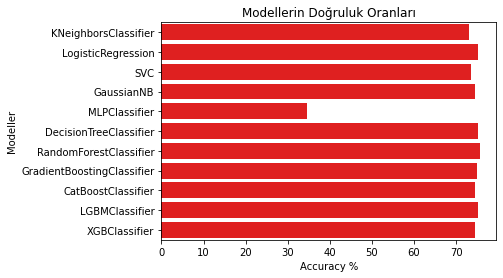

In [171]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    